# Results analysis from the forstpy brute force run over the 2019 holidays

analysis of timing an accurcy of mass training results

In [1]:
from results_imports import *

from scipy import optimize

from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams['font.serif'] = ['Times']
rcParams['font.size'] = 14

In [2]:

data = read_csv('../results/forestpy-timing-results.csv', index_col=0)

full_data = read_csv('../forestpy/param-lists/smaller_list_of_random_forests.csv', index_col=0)



i_data = data[np.logical_not(data['train time'].isna())]
i_data.sort_values('abs diff mean')[:10]

,status,e,md,mf,mln,msl,mss,tdp,computer,train time,predict time,diff mean,abs diff mean,diff var,abs diff var,median,mode,training time (hours)
name,,,,,,,,,,,,,,,,,,
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,8.0,5.0,25.0,bristlecone,0:34:04.931532,0:00:44.847418,-0.002681,1.146035,3.039994,1.726605,0.008198,NaN,0.568037
rfm_e50_md100_mfAUTO_mln50000_msl4_mss2_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,4.0,2.0,25.0,bristlecone,0:34:23.755556,0:00:44.871435,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.573265
rfm_e50_md100_mfAUTO_mln50000_msl4_mss5_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,4.0,5.0,25.0,bristlecone,0:34:18.075877,0:00:44.852166,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.571688
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,4.0,5.0,25.0,bristlecone,0:33:53.060940,0:00:44.975164,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.564739
rfm_e50_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml,complete,50.0,60.0,AUTO,50000.0,8.0,2.0,50.0,bristlecone,1:12:51.591553,0:00:44.624388,-0.002513,1.147438,2.940239,1.623631,0.007952,NaN,1.214331
rfm_e50_md100_mfAUTO_mln50000_msl8_mss2_tdp50.yml,complete,50.0,100.0,AUTO,50000.0,8.0,2.0,50.0,bristlecone,1:14:00.400040,0:00:44.793655,-0.002513,1.147438,2.940239,1.623631,0.007952,NaN,1.233444
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,2.0,10.0,25.0,bristlecone,0:34:02.142553,0:00:44.661029,-0.003075,1.147895,2.961271,1.643617,0.007651,NaN,0.567262
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,2.0,5.0,25.0,bristlecone,0:34:09.556335,0:00:45.035648,-0.003123,1.148517,2.961819,1.642738,0.007644,NaN,0.569321
rfm_e50_md100_mfAUTO_mln50000_msl2_mss2_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,2.0,2.0,25.0,bristlecone,0:34:20.209206,0:00:45.226154,-0.003126,1.148612,2.962087,1.642787,0.007652,NaN,0.572280


In [6]:
# by_time_data = i_data.sort_values('training time (hours)')
# scatter_by_param(by_time_data[by_time_data['training time (hours)'] < .5], param='mln')
# by_time_data[by_time_data['training time (hours)'] < .5].sort_values('abs diff mean')

sparse_sampled_data = i_data.sort_values('abs diff mean').iloc[::40, :]

scatter_by_param(sparse_sampled_data, param='mln')
#sparse_sampled_data.to_csv('../forestpy/param-lists/sparse-list-of-random-forests.csv', index_label='name')

,status,e,md,mf,mln,msl,mss,tdp,computer,train time,predict time,diff mean,abs diff mean,diff var,abs diff var,median,mode,training time (hours)
name,,,,,,,,,,,,,,,,,,
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,8.0,5.0,25.0,bristlecone,0:34:04.931532,0:00:44.847418,-0.002681,1.146035,3.039994,1.726605,0.008198,NaN,0.568037
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,complete,50.0,100.0,AUTO,50000.0,2.0,5.0,75.0,bristlecone,1:53:36.540309,0:00:44.435337,-0.001195,1.163487,2.941962,1.588262,0.007149,NaN,1.893483
rfm_e50_md25_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,25.0,AUTO,50000.0,8.0,5.0,25.0,finwhale,0:35:11.786205,0:00:45.551663,-0.003442,1.186070,3.302543,1.895792,0.010474,NaN,0.586607
rfm_e100_md25_mfAUTO_mln50000_msl4_mss5_tdp75.yml,complete,100.0,25.0,AUTO,50000.0,4.0,5.0,75.0,bristlecone,3:49:59.626848,0:01:27.042701,-0.001004,1.196938,3.181765,1.749105,0.010865,NaN,3.833230
rfm_e10_md100_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,10.0,100.0,AUTO,50000.0,8.0,5.0,25.0,mac-chickadee,0:09:02.168782,0:00:10.727407,-0.002480,1.205646,3.398819,1.945242,0.008922,NaN,0.150602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rfm_e10_md12_mfSQRT_mln5000_msl4_mss2_tdp25.yml,complete,10.0,12.0,SQRT,5000.0,4.0,2.0,25.0,bristlecone,0:01:18.505438,0:00:05.588294,0.000323,4.846406,40.868706,17.381060,0.371081,NaN,0.021807
rfm_e10_md12_mfLOG2_mln1000_msl8_mss2_tdp50.yml,complete,10.0,12.0,LOG2,1000.0,8.0,2.0,50.0,ocotal,0:05:14.563853,0:00:11.928453,0.000051,4.859717,40.751261,17.134415,0.356112,NaN,0.087379
rfm_e50_md12_mfSQRT_mln1000_msl2_mss2_tdp50.yml,complete,50.0,12.0,SQRT,1000.0,2.0,2.0,50.0,bristlecone,0:12:02.560731,0:00:21.628711,-0.000123,4.883854,41.023534,17.171506,0.424669,NaN,0.200711


In [4]:
sparse_sampled_data = i_data.sort_values('abs diff mean').iloc[10::40, :]

sparse_sampled_data['status'] = 'not run'
sparse_sampled_data [['computer',
       'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
       'abs diff var', 'median', 'mode', 'training time (hours)']] = ''
sparse_sampled_data['r^2'] = ''
sparse_sampled_data
# scatter_by_param(sparse_sampled_data, param='mln')
sparse_sampled_data.to_csv('../forestpy/param-lists/sparse-list-of-random-forests.csv', 
    index_label='name', mode='a',header=False
)
### REMEMBER to fix new line

In [16]:
def scatter_by_param(data, param, add_var=False, title = '', 
    curve_fit = False, x_data = 'abs diff mean',
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']):
    """creates color coded scatter plot by param for abs diff mean
    """
    
    symbols = ['o','o','o','o']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    #ax.axis([ -.01, .01,-.1, 7])
    
    cix = 0
    for v in vals:
        data[data[param] == v].plot.scatter(
            y = 'training time (hours)', x = x_data  ,
            c=colors[cix], marker=symbols[cix],
            ax=ax, 
            label= hp_lookup[param]  + ' = ' + str(v))
        cix += 1
    if add_var:
        data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = x_data ,
                            c='tab:orange',marker = '.', ax = ax, alpha = .5, label="Variance < 5")

    if curve_fit:
        c_data = data[['abs diff mean','training time (hours)']].sort_values(x_data)
        x_data = c_data[x_data]
        y_data = c_data['training time (hours)']
#         curve = lambda  x, a,b,c: a * np.exp(-b * x) + c
        curve = lambda  x, m, b: m*x + b
        popt, pcov = optimize.curve_fit(curve, x_data, y_data)
        
        x_data = np.linspace(x_data.min(), x_data.max(), 50)
        plt.plot(x_data, curve(x_data, *popt), 'r-')
        
#     data.plot.trendline.sort_index(ascending=False).plot(ax=ax)
#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Mean Absoloute Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    ax.set_title(title)
    return ax

    

Index(['status', 'e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',
       'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
       'abs diff var', 'median', 'mode', 'training time (hours)'],
      dtype='object')

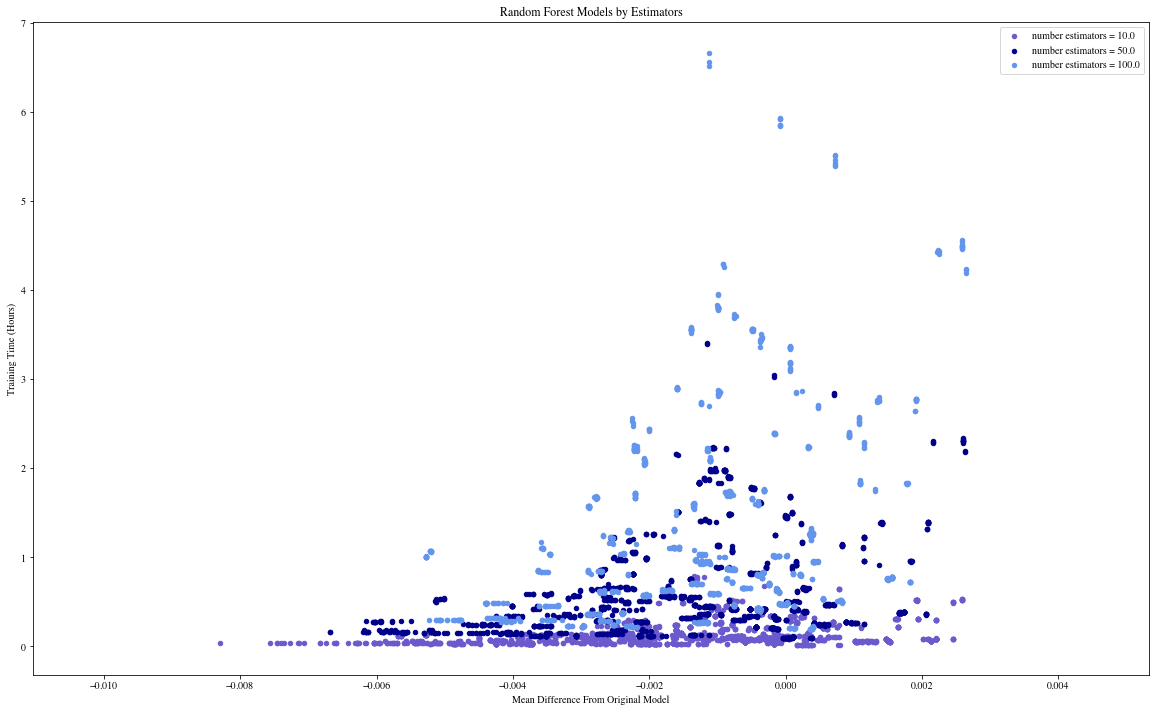

In [17]:
ax = scatter_by_param(i_data, 'e', False, title = 'Random Forest Models by Estimators', x_data = 'diff mean')
ax.set_xlabel('Mean Difference From Original Model')
# scatter_by_param(i_data, 'md', True)
# scatter_by_param(i_data, 'e', True)
# scatter_by_param(i_data, 'mln', True)
# scatter_by_param(i_data, 'msl', True)
# scatter_by_param(i_data, 'mss', True)
# scatter_by_param(i_data, 'tdp', True)
# scatter_by_param(i_data, 'computer', True)
i_data.columns

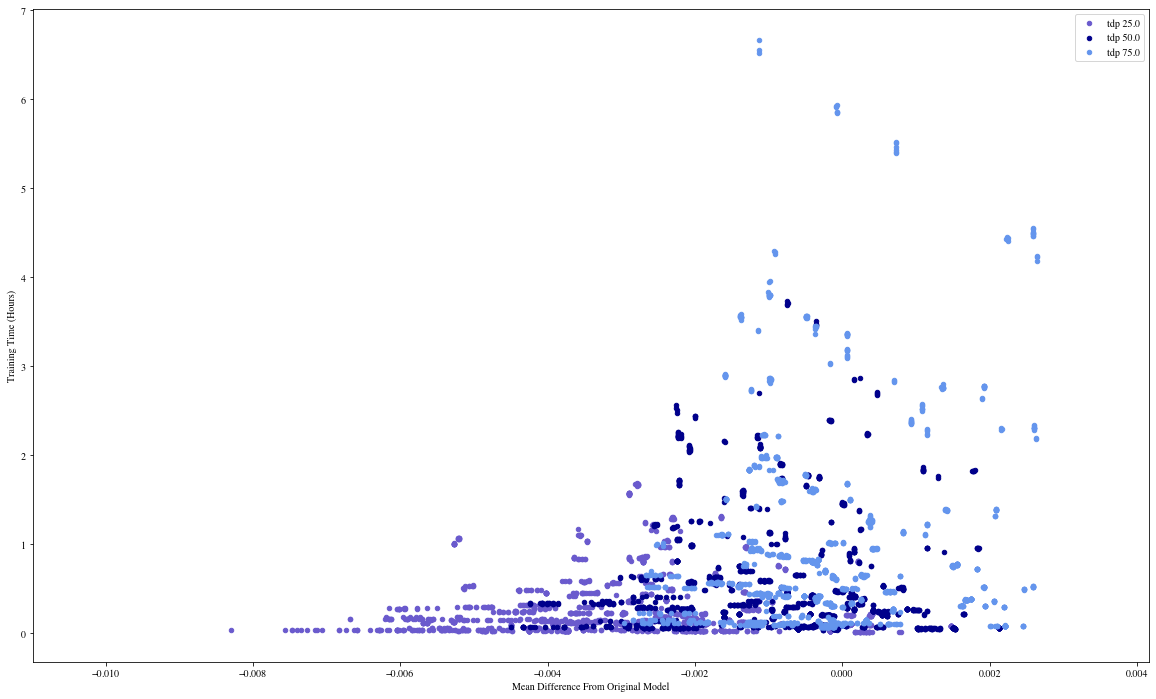

In [5]:
def scatter_by_param_2(data, param, add_var=False, title='', curve_fit= False):
    """creates color coded scatter plot by param for diff mean
    """
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    cix = 0
    for v in vals:
        data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'diff mean' ,c=colors[cix], ax=ax, label= param + ' ' + str(v))
        cix += 1
    if add_var:
        data[data['diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = 1, label="Variance < 5")


#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    ax.set_title(title)

scatter_by_param_2(i_data, 'tdp', False)

In [6]:
i_data['training time (hours)'].cov(i_data['diff mean'])#('diff mean','training time (hours)')

0.00030203039973230407

In [7]:
param = 'mss'
vals = i_data[param].unique()
for v in vals:
    ss = i_data[i_data[param] == v]
    print(v, ss['abs diff mean'].mean(), ss['abs diff var'].mean())
#     print(v, ss['diff mean'].mean(), ss['diff var'].mean())
print ('')
for v in vals:
    ss = i_data[i_data[param] == v]
#     print(v, ss['abs diff mean'].mean(), ss['abs diff var'].mean())
    print(v, ss['diff mean'].mean(), ss['diff var'].mean())

2.0 3.384714890115292 10.23209330160868
5.0 3.3745619870195536 10.19152198032277
10.0 3.3705105274871623 10.164736344550088

2.0 -0.0013313126343385555 22.97219482904066
5.0 -0.001359945913686829 22.87650178394846
10.0 -0.0013389624553291257 22.794229548268973


In [8]:
# i_data['train time'].sort_values()

In [9]:
#i_data.to_csv('clean_data.csv')

In [10]:
l_c = []
for param in ['e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',]:
    print(param, i_data[param].unique())
    l_c.append(list(i_data[param].unique()))
    
print ('min abs diff mean',i_data['abs diff mean'].min())

p = 1
for l in l_c[:-1]:
    print(len(l))
    p *= len(l)
print(p)
4*4*3*4*4*3*3

e [ 10.  50. 100.]
md [ 12.  25.  60. 100.]
mf ['AUTO' 'SQRT' 'LOG2']
mln [ 1000.  5000. 10000. 50000.]
msl [1. 2. 4. 8.]
mss [ 2.  5. 10.]
tdp [25. 50. 75.]
computer ['finwhale' 'ocotal' 'bristlecone' 'mac-chickadee']
min abs diff mean 1.1460350482793569
3
4
3
4
4
3
3
5184


6912

# cell below is the hyperparameter 'seive'

In [11]:
print(i_data.columns)


idx_list = [('tdp',75),]# ('md',60), ('mf', 'AUTO'),('mln', 50000), ('msl', 4), ('mss',5), ('tdp',25)]
idx = i_data['e'] > 0


build_idx = lambda idx, data ,nf, nfv: np.logical_and(idx, data[nf] == nfv )

for i_l in idx_list:
    idx = build_idx(idx, i_data, i_l[0], i_l[1])

# print(i_data.shape)
print(i_data[idx].shape)
i_data[idx][['abs diff mean', 'abs diff var','training time (hours)']].sort_values('abs diff mean')[:10]


Index(['status', 'e', 'md', 'mf', 'mln', 'msl', 'mss', 'tdp', 'computer',
       'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
       'abs diff var', 'median', 'mode', 'training time (hours)'],
      dtype='object')
(1728, 18)


,abs diff mean,abs diff var,training time (hours)
name,,,
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.874627
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,1.160473,1.602006,1.882754
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,1.163443,1.588280,1.876119
rfm_e50_md60_mfAUTO_mln50000_msl2_mss2_tdp75.yml,1.163486,1.588269,1.870906
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,1.163487,1.588262,1.893483
rfm_e50_md60_mfAUTO_mln50000_msl8_mss2_tdp75.yml,1.180241,1.702501,1.973292
rfm_e50_md100_mfAUTO_mln50000_msl4_mss10_tdp75.yml,1.182403,1.688901,1.991090


In [12]:
from pandas import Index
list_of_models = [
    'rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml','rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml','rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml','rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml','rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml','rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml','rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml','rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml','rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml','rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml','rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml','rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml',
]

# Save the baseline models timing

In [26]:
base_line_models = i_data[['diff mean','diff var','abs diff mean', 'abs diff var','training time (hours)']].ix[list_of_models].sort_values('abs diff mean')

base_line_models.columns = [[
    'mean difference', 'variance of difference', 
    'mean absolute difference', 'variance of absolute difference',
    'training time (hours)'

]]

base_line_models.to_csv('../results/baseline-models-accuracy.csv', index_label=False)
base_line_models

,mean difference,variance of difference,mean absolute difference,variance of absolute difference,training time (hours)
name,,,,,
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,-0.002681,3.039994,1.146035,1.726605,0.568037
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,-0.003108,2.976562,1.146401,1.662335,0.564739
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,-0.003108,2.976562,1.146401,1.662335,0.564739
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,-0.001127,2.948703,1.160473,1.602006,1.874627
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,-0.001127,2.948703,1.160473,1.602006,1.882754
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,-0.001199,2.941877,1.163443,1.588280,1.876119
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,-0.002526,3.117974,1.171312,1.746009,1.221215
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,-0.002581,3.101463,1.173560,1.724226,1.224195
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,-0.002567,3.101660,1.173625,1.724271,1.231990


In [16]:
def scatter_by_param_4(data, param, add_var=False, list_of_targets=[]):
    """creates color coded scatter plot by param for abs diff mean, also shows chosen models
    """
    colors = [  'slateblue', 'darkblue', 'cornflowerblue','skyblue']
    symbols = ['o','o','o','o']
    
    vals = data[param].unique()
    
    fig, ax = plt.subplots(figsize = (20, 12))
    
    cix = 0
#     for v in vals:
#         data[data[param] == v].plot.scatter(y = 'training time (hours)', x = 'abs diff mean'  ,alpha = .25, c=colors[cix], marker=symbols[cix], ax=ax, label= param + ' ' + str(v))
#         cix += 1
    if add_var:
        data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                            c='tab:orange',marker = '.', ax = ax, alpha = .5, label="Variance < 5")

#     data.ix(np.array(list_of_targets))
#     for target in list_of_targets:
#         print (data.ix[target])
    i_data[['abs diff mean', 'abs diff var','training time (hours)']].ix[list_of_targets].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
                        c='tab:red',marker = 'o',s=80, ax = ax, alpha = 1, label="Variance < 5")
#     if add_var:
#         data[data['abs diff var'] < 5].plot.scatter(y = 'training time (hours)', x = 'abs diff mean' ,
#                             c='tab:red',marker = '.', ax = ax, alpha = 1, label="Variance < 5")

    ax.set_xlabel('Absoloute Mean Difference From Original Model')
    ax.set_ylabel('Training Time (Hours)')
    ax.legend()
    
    

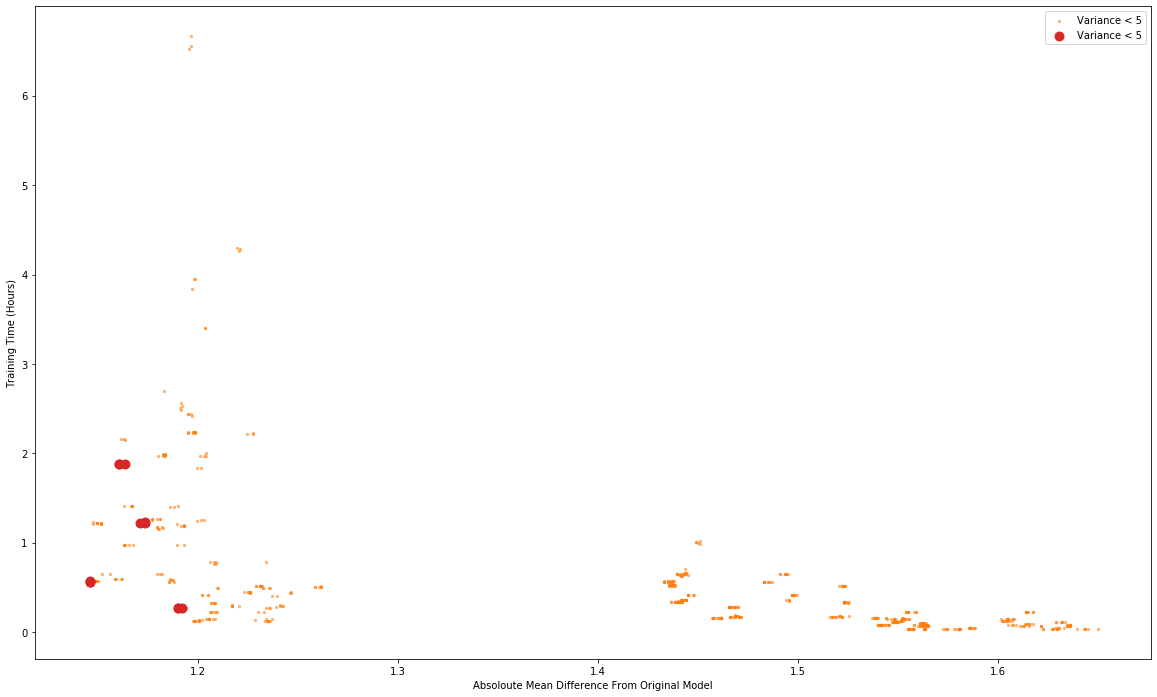

In [17]:
scatter_by_param_4(i_data, 'md', True, list_of_models)

In [18]:
i_data['train time'].apply(to_td).sum()

Timedelta('125 days 17:38:38.230825')

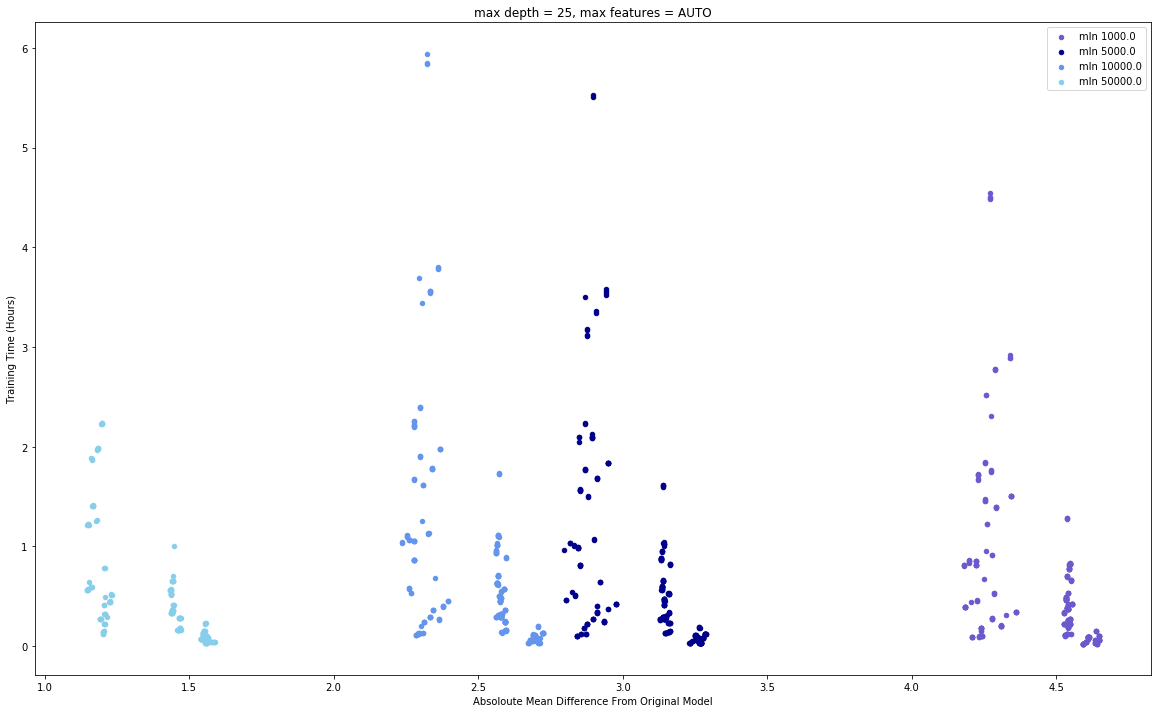

In [29]:
idx_list = []
# idx_list.append(('tdp',75))
idx_list.append(('md',60)) 
# idx_list.append(('mf', 'AUTO'))
# idx_list.append(('mln', 50000))
# idx_list.append(('msl', 4))
# idx_list.append(('mss',5))
# idx_list.append(('tdp',25))
    
def build_index_adv(in_data, idx_list):
   
    idx = in_data['e'] > 0

    build_idx = lambda idx, data ,nf, nfv: np.logical_and(idx, data[nf] == nfv )

    for i_l in idx_list:
        idx = build_idx(idx, in_data, i_l[0], i_l[1])
    return idx


s_data = i_data[ build_index_adv (i_data, idx_list)]#.plot.scatter(y = 'training time (hours)', x = 'abs diff mean', ax =ax )


scatter_by_param(s_data, 'mln', title = "max depth = 25, max features = AUTO")

In [73]:
def seive_scatter(data, idx_list, high_light_feature, curve_fit = False):
    idx = build_index_adv(data,idx_list)
    title = "Scatter Where: "
    
    for item in idx_list:
        title += hp_lookup[item[0]] + ' = ' + str(item[1]) + ', '
        
    title = title[:-2] # remove last comma
    
    s_data = data[ build_index_adv (data, idx_list)]#.plot.scatter(y = 'training time (hours)', x = 'abs diff mean', ax =ax )
    scatter_by_param(s_data, high_light_feature, title = title, curve_fit=curve_fit)
   
   
def seive_scatter_m(data, idx_list, high_light_feature, curve_fit = False):
    idx = build_index_adv(data,idx_list)
    title = "Scatter Where: "
    
    for item in idx_list:
        title += hp_lookup[item[0]] + ' = ' + str(item[1]) + ', '
        
    title = title[:-2] # remove last comma
    
    s_data = data[ build_index_adv (data, idx_list)]#.plot.scatter(y = 'training time (hours)', x = 'abs diff mean', ax =ax )
    scatter_by_param_2(s_data, high_light_feature, title = title, curve_fit=curve_fit)





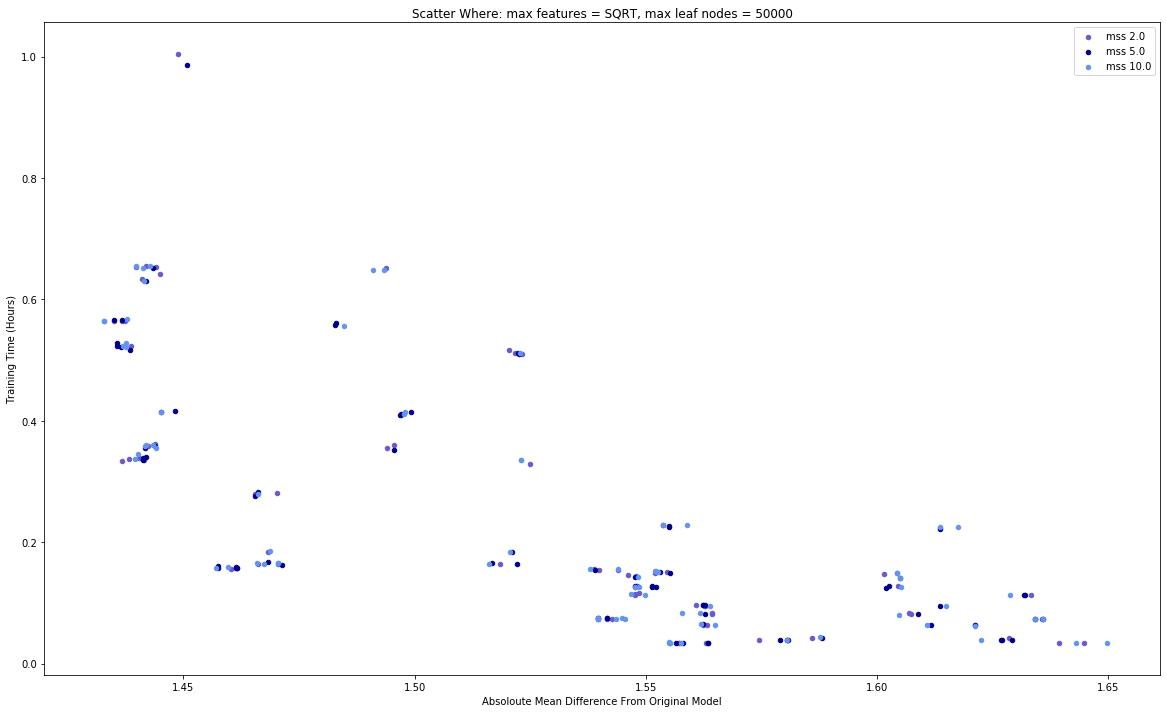

In [127]:
idx_list = []
# idx_list.append(('md',12)) 
idx_list.append(('mf', 'SQRT'))
# idx_list.append(('msl', 4))
# idx_list.append(('mss',10))
# idx_list.append(('tdp',25))

idx_list.append(('mln', 50000))

seive_scatter(data[data['md'] > 12], idx_list, 'mss', curve_fit= False)

# idx_list.pop()
# idx_list.append(('mln', 5000))
# seive_scatter(data, idx_list, 'mln', curve_fit= False)

# idx_list.pop()
# idx_list.append(('mln', 10000))
# seive_scatter(data, idx_list, 'mln', curve_fit= False)

# idx_list.pop()
# idx_list.append(('mln', 50000))
# seive_scatter(data, idx_list, 'mln', curve_fit= False)


{'all msl mean': 1.571440954917472,
 'all msl var': 0.0031669153390013636,
 'msl = 1.0 mean': 1.5711921163234963,
 'msl = 1.0 var': 0.003030392821125434,
 'msl = 2.0 mean': 1.5632349693668768,
 'msl = 2.0 var': 0.003589609865546567,
 'msl = 4.0 mean': 1.5679759875842112,
 'msl = 4.0 var': 0.0035961511461387306,
 'msl = 8.0 mean': 1.5800232047815104,
 'msl = 8.0 var': 0.002919753993328766,
 'variance of each msl mean': 3.0166658809403985e-05}

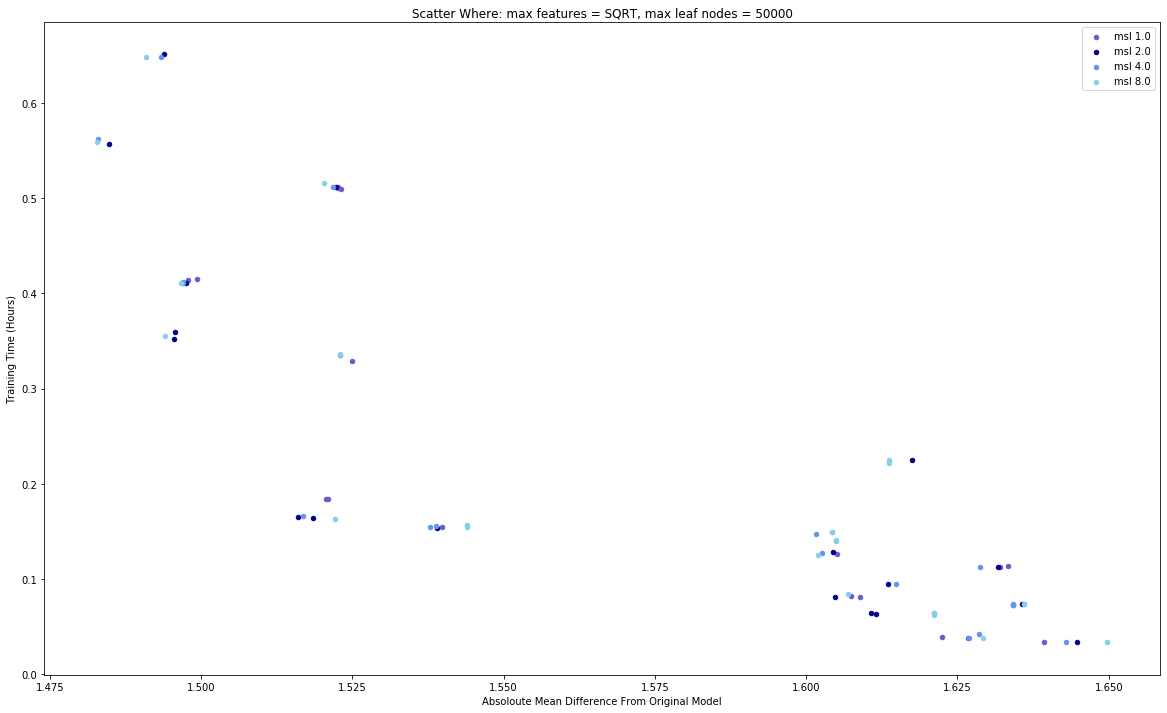

In [160]:

def mean_by_parameter (c_data, param):




    u_values =  i_data[param].unique()


    stats = {}

    stats['all ' + param + ' mean'] = c_data['abs diff mean'].mean()
    stats['all ' + param + ' var'] = c_data['abs diff mean'].var()

    param_means = [stats['all ' + param + ' mean']]

    for val in u_values:
        stats[param + ' = ' + str(val) + ' mean'] = c_data[build_index_adv(c_data,[(param,val)])]['abs diff mean'].mean()
        stats[param + ' = ' + str(val) + ' var'] = c_data[build_index_adv(c_data,[(param,val)])]['abs diff mean'].var()
        param_means.append(stats[param + ' = ' + str(val) + ' mean'])


    stats['variance of each '+ param +' mean'] = np.array(param_means).var()
    
#     stats['key stat'] = stats['variance of each '+ param +' mean']

    return stats


c_data = i_data[i_data['md'] == 25]

seive_scatter(c_data, idx_list, 'msl', curve_fit= False)

mean_by_parameter(c_data[build_index_adv(c_data,idx_list)], 'msl')


In [37]:
#what % or 100e models ran?
idx_all = full_data['e'] ==100

all_100 = full_data[idx_all].shape[0]

idx_run = full_data[idx_all]['status'] == 'complete'

run_100 = full_data[idx_all][idx_run].shape[0]

run_100/all_100 * 100

83.02752293577981

,status,e,md,mf,mln,msl,mss,tdp,computer,train time,predict time,diff mean,abs diff mean,diff var,abs diff var,median,mode,training time (hours)
name,,,,,,,,,,,,,,,,,,
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,8.0,5.0,25.0,bristlecone,0:34:04.931532,0:00:44.847418,-0.002681,1.146035,3.039994,1.726605,0.008198,NaN,0.568037
rfm_e50_md100_mfAUTO_mln50000_msl4_mss2_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,4.0,2.0,25.0,bristlecone,0:34:23.755556,0:00:44.871435,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.573265
rfm_e50_md100_mfAUTO_mln50000_msl4_mss5_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,4.0,5.0,25.0,bristlecone,0:34:18.075877,0:00:44.852166,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.571688
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,4.0,5.0,25.0,bristlecone,0:33:53.060940,0:00:44.975164,-0.003108,1.146401,2.976562,1.662335,0.007719,NaN,0.564739
rfm_e50_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml,complete,50.0,60.0,AUTO,50000.0,8.0,2.0,50.0,bristlecone,1:12:51.591553,0:00:44.624388,-0.002513,1.147438,2.940239,1.623631,0.007952,NaN,1.214331
rfm_e50_md100_mfAUTO_mln50000_msl8_mss2_tdp50.yml,complete,50.0,100.0,AUTO,50000.0,8.0,2.0,50.0,bristlecone,1:14:00.400040,0:00:44.793655,-0.002513,1.147438,2.940239,1.623631,0.007952,NaN,1.233444
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,2.0,10.0,25.0,bristlecone,0:34:02.142553,0:00:44.661029,-0.003075,1.147895,2.961271,1.643617,0.007651,NaN,0.567262
rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,2.0,5.0,25.0,bristlecone,0:34:09.556335,0:00:45.035648,-0.003123,1.148517,2.961819,1.642738,0.007644,NaN,0.569321
rfm_e50_md100_mfAUTO_mln50000_msl2_mss2_tdp25.yml,complete,50.0,100.0,AUTO,50000.0,2.0,2.0,25.0,bristlecone,0:34:20.209206,0:00:45.226154,-0.003126,1.148612,2.962087,1.642787,0.007652,NaN,0.572280


,name,status,e,md,mf,mln,msl,mss,tdp,computer,train time,predict time,diff mean,abs diff mean,diff var,abs diff var,median,mode,training time (hours),r^2
0,rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,60.0,AUTO,50000.0,8.0,5.0,25.0,ocotal,0:41:20.608450,0:00:39.996300,-0.002525,1.157600,3.138042,1.798010,0.008117,NaN,NaN,0.983808
1,rfm_e50_md100_mfAUTO_mln50000_msl2_mss5_tdp75.yml,complete,50.0,100.0,AUTO,50000.0,2.0,5.0,75.0,finwhale,1:17:26.933209,0:00:29.521916,-0.001159,1.182020,3.079123,1.681952,0.008469,NaN,NaN,0.984112
2,rfm_e50_md25_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,50.0,25.0,AUTO,50000.0,8.0,5.0,25.0,bristlecone,0:22:37.552727,0:00:30.633898,-0.002209,1.186380,3.298571,1.891078,0.011955,NaN,NaN,0.982979
3,rfm_e100_md25_mfAUTO_mln50000_msl4_mss5_tdp75.yml,complete,100.0,25.0,AUTO,50000.0,4.0,5.0,75.0,bristlecone,2:47:51.164530,0:00:57.936676,-0.001004,1.196938,3.181765,1.749105,0.010865,NaN,NaN,0.983582
4,rfm_e10_md100_mfAUTO_mln50000_msl8_mss5_tdp25.yml,complete,10.0,100.0,AUTO,50000.0,8.0,5.0,25.0,ocotal,0:05:39.008684,0:00:09.500778,-0.002824,1.209078,3.456397,1.994536,0.008942,NaN,NaN,0.982165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,rfm_e10_md12_mfLOG2_mln1000_msl4_mss5_tdp25.yml,not run,10.0,12.0,LOG2,1000.0,4.0,5.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,rfm_e10_md12_mfLOG2_mln1000_msl4_mss2_tdp50.yml,not run,10.0,12.0,LOG2,1000.0,4.0,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,rfm_e50_md12_mfSQRT_mln1000_msl2_mss5_tdp75.yml,not run,50.0,12.0,SQRT,1000.0,2.0,5.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,rfm_e10_md12_mfLOG2_mln50000_msl2_mss2_tdp75.yml,not run,10.0,12.0,LOG2,50000.0,2.0,2.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
